# Análisis de Machine Learning: Predicción de Cáncer de Pulmón

## Proyecto de clasificación binaria para identificar pacientes con riesgo de cáncer de pulmón

Este notebook implementa un ciclo completo de Machine Learning utilizando el dataset `survey_lung_cancer.csv` de Kaggle. El objetivo es predecir si un paciente tiene cáncer de pulmón basándose en factores personales y clínicos.

### Contexto del Problema:
- **Tipo**: Clasificación binaria (YES/NO para cáncer de pulmón)
- **Variables**: Mezcla de categóricas y numéricas
- **Objetivo**: Identificar patrones que indiquen riesgo de cáncer de pulmón

## 1. Importación de Librerías

In [58]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report, 
                           roc_curve, auc, roc_auc_score)

# Suprimir warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y Exploración del Dataset

In [59]:
# Cargar el dataset
df = pd.read_csv('survey_lung_cancer.csv')

print("INFORMACIÓN DEL DATASET")
print("="*50)
print(f"Forma del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("\nPRIMERAS 5 FILAS:")
display(df.head())

print("\nINFORMACIÓN GENERAL:")
print(df.info())

print("\nNOMBRES DE LAS COLUMNAS:")
print(df.columns.tolist())

INFORMACIÓN DEL DATASET
Forma del dataset: (309, 16)
Número de filas: 309
Número de columnas: 16

PRIMERAS 5 FILAS:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO



INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  L

## 3. Estadísticas Descriptivas

In [60]:
# Descripción estadística de todas las características
print("ESTADÍSTICAS DESCRIPTIVAS COMPLETAS")
print("="*60)
display(df.describe(include='all'))

print("\nDISTRIBUCIÓN DE LA VARIABLE OBJETIVO (LUNG_CANCER):")
target_counts = df['LUNG_CANCER'].value_counts()
print(target_counts)
print(f"\nPorcentaje de casos positivos: {target_counts['YES']/len(df)*100:.2f}%")
print(f"Porcentaje de casos negativos: {target_counts['NO']/len(df)*100:.2f}%")

# Identificar tipos de datos
print("\nTIPOS DE DATOS POR COLUMNA:")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {df[col].dtype} (valores únicos: {unique_vals})")
    if unique_vals <= 10:  # Mostrar valores únicos para columnas categóricas
        print(f"  -> Valores: {sorted(df[col].unique())}")
    print()

ESTADÍSTICAS DESCRIPTIVAS COMPLETAS


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN



DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (LUNG_CANCER):
LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

Porcentaje de casos positivos: 87.38%
Porcentaje de casos negativos: 12.62%

TIPOS DE DATOS POR COLUMNA:
GENDER: object (valores únicos: 2)
  -> Valores: ['F', 'M']

AGE: int64 (valores únicos: 39)

SMOKING: int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

YELLOW_FINGERS: int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

ANXIETY: int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

PEER_PRESSURE: int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

CHRONIC DISEASE: int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

FATIGUE : int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

ALLERGY : int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

WHEEZING: int64 (valores únicos: 2)
  -> Valores: [np.int64(1), np.int64(2)]

ALCOHOL CONSUMING: int64 (valores únicos: 2)
  

## 4. Detección de Valores Faltantes

In [61]:
# Detectar valores faltantes
print("ANÁLISIS DE VALORES FALTANTES")
print("="*50)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje (%)': missing_percent.values
}).sort_values('Valores Faltantes', ascending=False)

print("RESUMEN DE VALORES FALTANTES:")
display(missing_info)

if missing_data.sum() == 0:
    print("Excelente! No hay valores faltantes en el dataset.")
else:
    # Crear visualización de valores faltantes
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Mapa de calor de valores faltantes
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0])
    axes[0].set_title('Mapa de Calor - Valores Faltantes', fontsize=14)
    
    # Gráfico de barras de valores faltantes
    missing_cols = missing_info[missing_info['Valores Faltantes'] > 0]
    if not missing_cols.empty:
        sns.barplot(data=missing_cols, x='Valores Faltantes', y='Columna', ax=axes[1])
        axes[1].set_title('Cantidad de Valores Faltantes por Columna', fontsize=14)
    
    plt.tight_layout()
    plt.show()

ANÁLISIS DE VALORES FALTANTES
RESUMEN DE VALORES FALTANTES:


,Columna,Valores Faltantes,Porcentaje (%)
0,GENDER,0,0.0
1,AGE,0,0.0
2,SMOKING,0,0.0
3,YELLOW_FINGERS,0,0.0
4,ANXIETY,0,0.0
5,PEER_PRESSURE,0,0.0
6,CHRONIC DISEASE,0,0.0
7,FATIGUE,0,0.0
8,ALLERGY,0,0.0
9,WHEEZING,0,0.0


Excelente! No hay valores faltantes en el dataset.


## 5. Distribuciones de Variables

ANÁLISIS DE DISTRIBUCIONES
Columnas numéricas: ['AGE']
Columnas categóricas: ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']


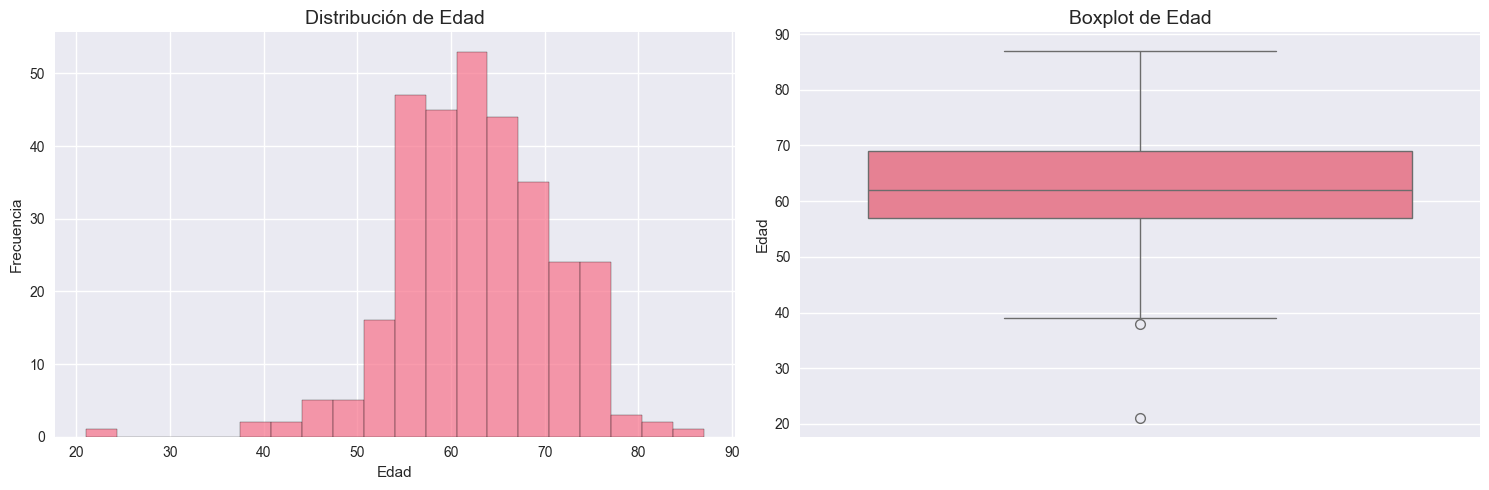


ESTADÍSTICAS DE EDAD POR GRUPO:


,count,mean,std,min,25%,50%,75%,max
LUNG_CANCER,,,,,,,,
NO,39.0,60.743590,9.629226,21.0,57.0,61.0,65.5,87.0
YES,270.0,62.951852,7.966560,38.0,58.0,62.5,69.0,81.0


In [62]:
# Identificar columnas numéricas y categóricas
numeric_cols = ['AGE']  # Solo AGE es verdaderamente numérica
categorical_cols = [col for col in df.columns if col not in ['AGE', 'LUNG_CANCER']]

print("ANÁLISIS DE DISTRIBUCIONES")
print("="*50)
print(f"Columnas numéricas: {numeric_cols}")
print(f"Columnas categóricas: {categorical_cols}")

# 1. Análisis de características numéricas (AGE)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de edad
axes[0].hist(df['AGE'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Edad', fontsize=14)
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Boxplot de edad
sns.boxplot(y=df['AGE'], ax=axes[1])
axes[1].set_title('Boxplot de Edad', fontsize=14)
axes[1].set_ylabel('Edad')

plt.tight_layout()
plt.show()

# Estadísticas de edad por grupo de cáncer
print("\nESTADÍSTICAS DE EDAD POR GRUPO:")
age_stats = df.groupby('LUNG_CANCER')['AGE'].describe()
display(age_stats)


ANÁLISIS DE VARIABLES CATEGÓRICAS:


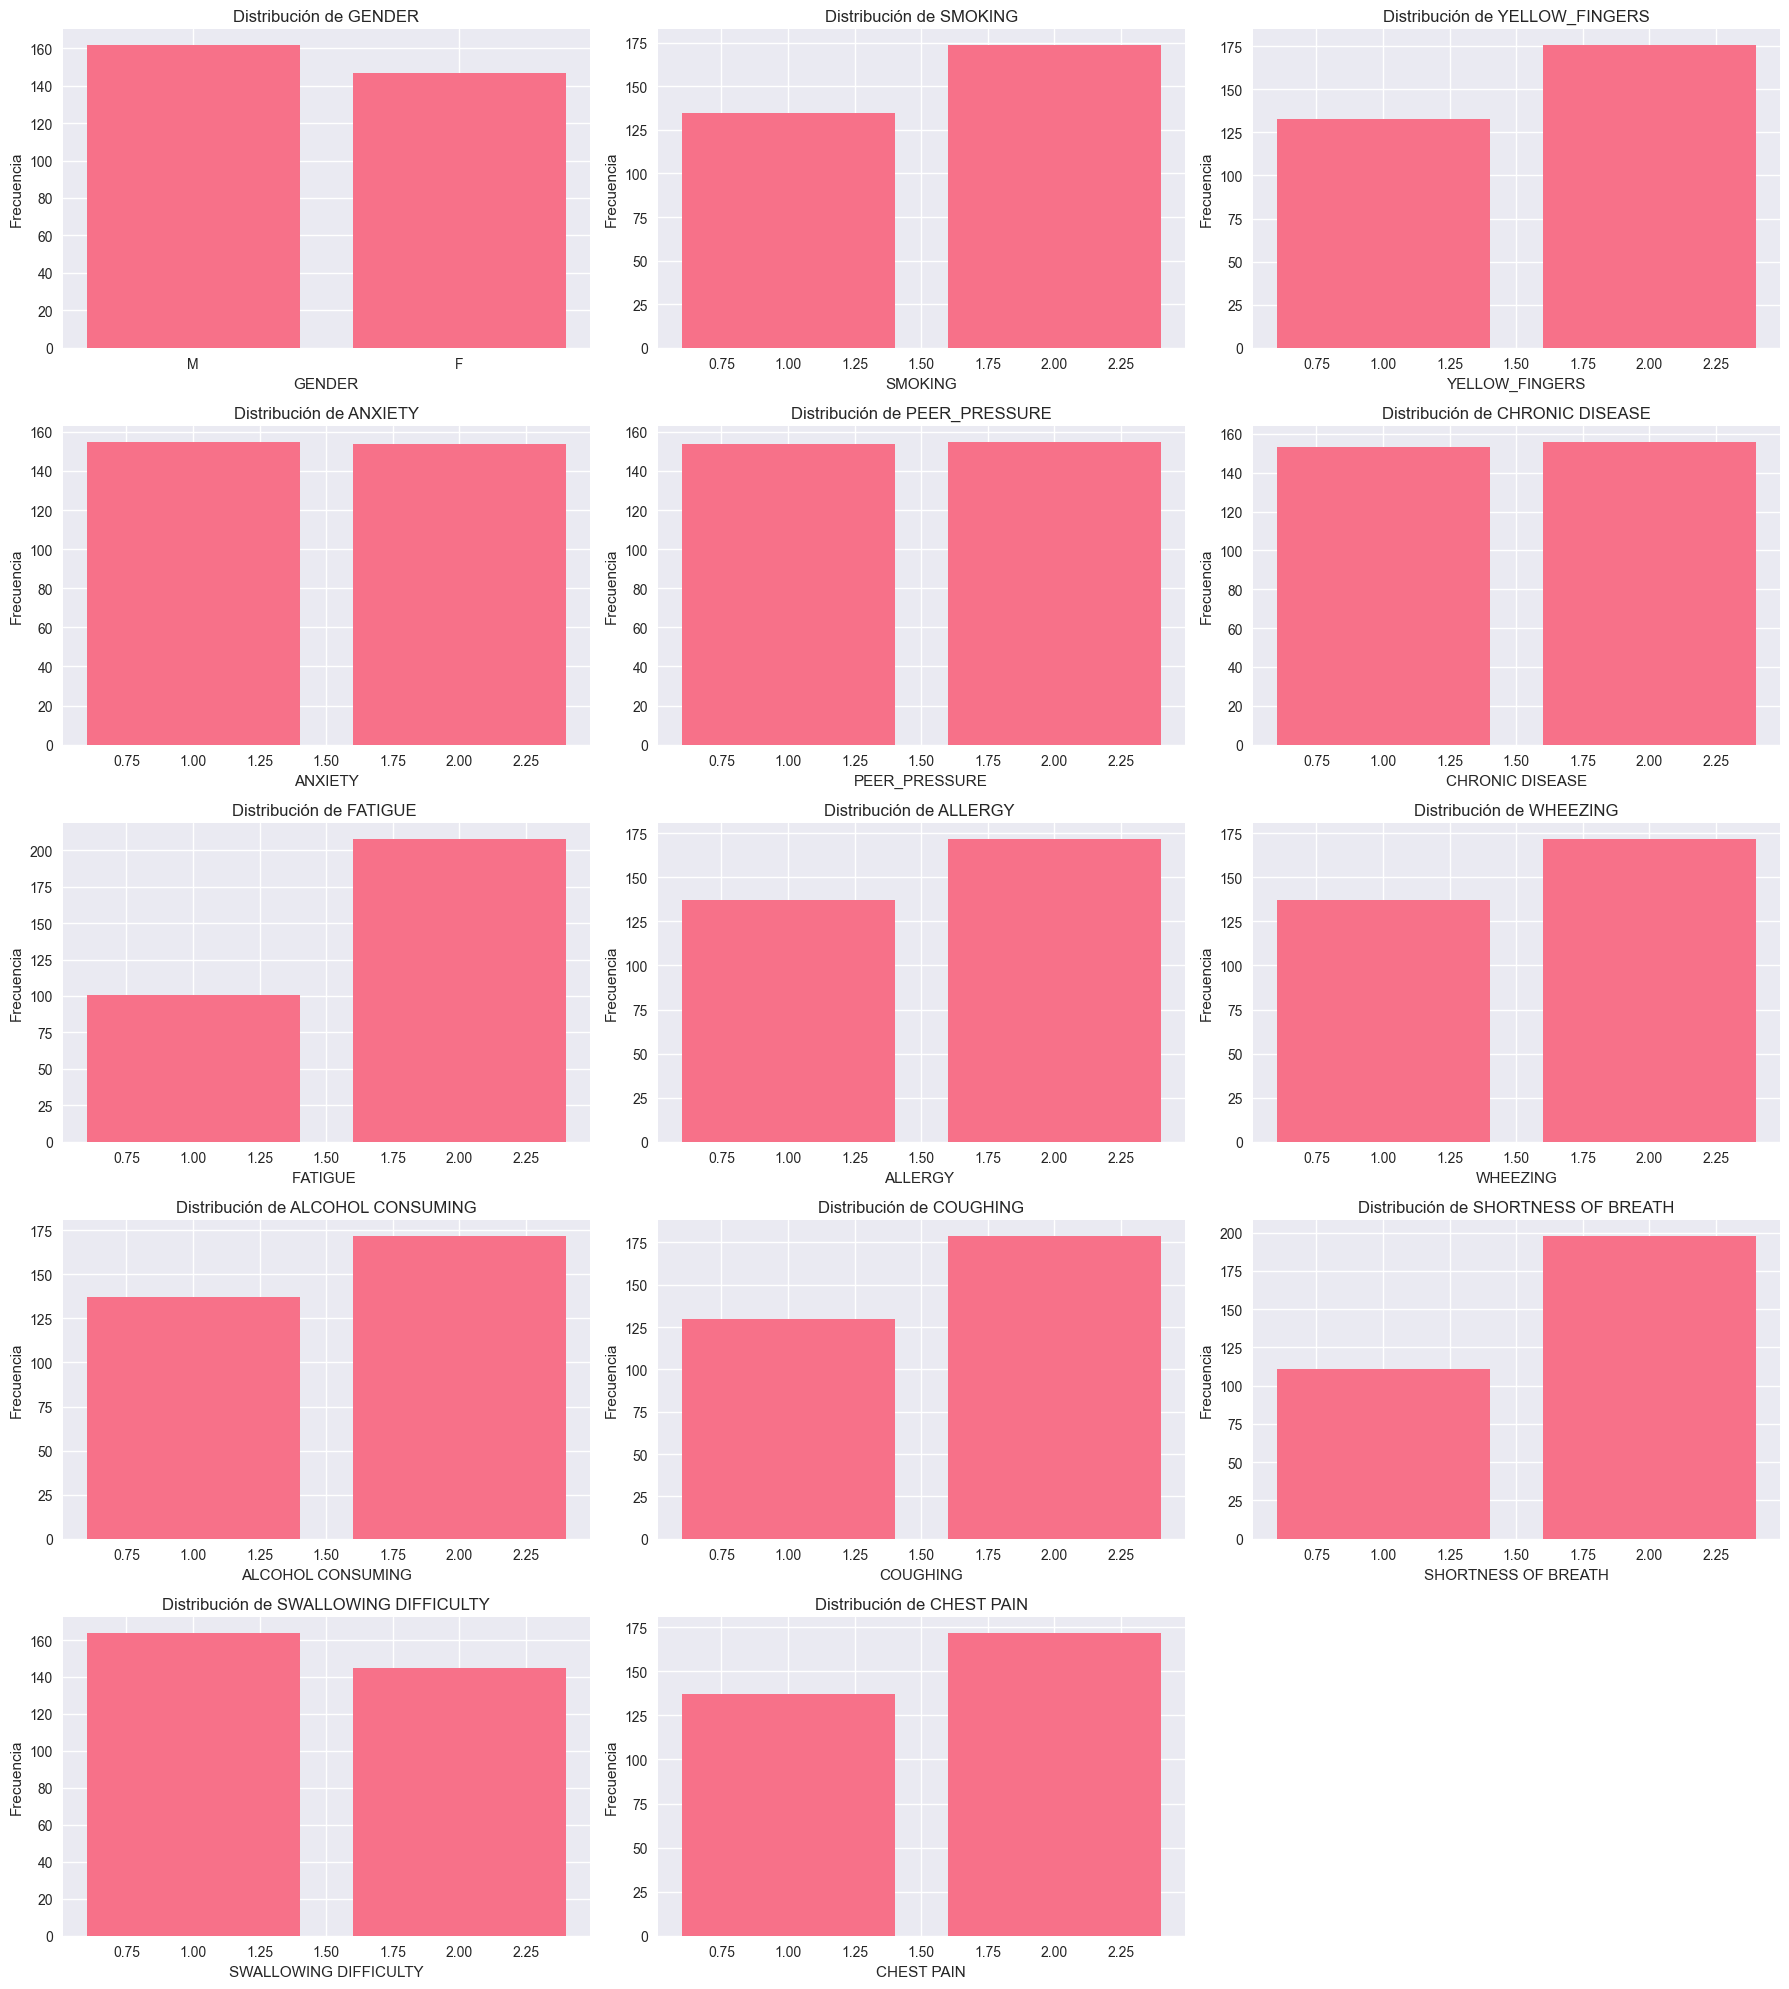


DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:


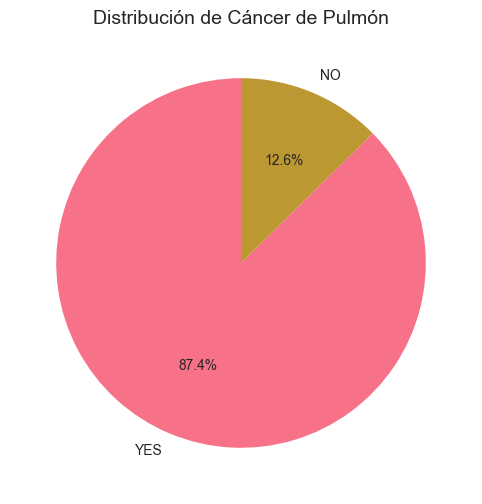

In [63]:
# 2. Análisis de características categóricas
print("\nANÁLISIS DE VARIABLES CATEGÓRICAS:")

# Crear subplots para todas las variables categóricas
n_cols = 3
n_rows = len(categorical_cols) // n_cols + (1 if len(categorical_cols) % n_cols > 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        value_counts = df[col].value_counts()
        axes[i].bar(value_counts.index, value_counts.values)
        axes[i].set_title(f'Distribución de {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        
        # Rotar etiquetas si es necesario
        if len(str(value_counts.index[0])) > 2:
            axes[i].tick_params(axis='x', rotation=45)

# Ocultar axes vacíos
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis de la variable objetivo
print("\nDISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
target_dist = df['LUNG_CANCER'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Cáncer de Pulmón', fontsize=14)
plt.show()

## 6. Matriz de Correlaciones

ANÁLISIS DE CORRELACIONES
Variables convertidas para análisis de correlación


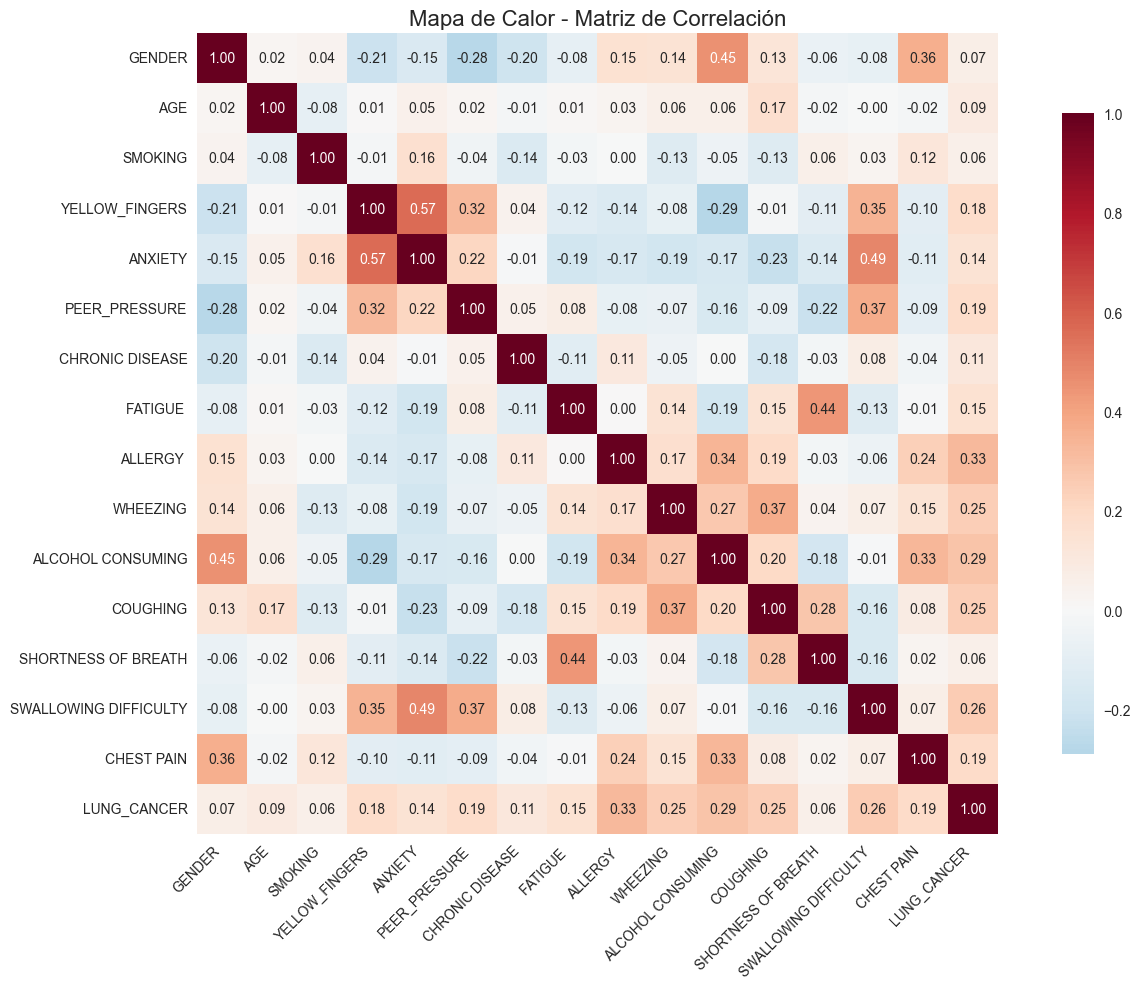


CORRELACIONES CON LA VARIABLE OBJETIVO (LUNG_CANCER):
ALLERGY                   :  0.328
ALCOHOL CONSUMING         :  0.289
SWALLOWING DIFFICULTY     :  0.260
WHEEZING                  :  0.249
COUGHING                  :  0.249
CHEST PAIN                :  0.190
PEER_PRESSURE             :  0.186
YELLOW_FINGERS            :  0.181
FATIGUE                   :  0.151
ANXIETY                   :  0.145
CHRONIC DISEASE           :  0.111
AGE                       :  0.089
GENDER                    :  0.067
SHORTNESS OF BREATH       :  0.061
SMOKING                   :  0.058

TOP 5 CARACTERÍSTICAS MÁS CORRELACIONADAS:
• ALLERGY : 0.328
• ALCOHOL CONSUMING: 0.289
• SWALLOWING DIFFICULTY: 0.260
• WHEEZING: 0.249
• COUGHING: 0.249


In [64]:
# Para calcular correlaciones, necesitamos convertir variables categóricas a numéricas
print("ANÁLISIS DE CORRELACIONES")
print("="*50)

# Crear una copia del dataframe para análisis numérico
df_numeric = df.copy()

# Convertir variables categóricas binarias a numéricas
df_numeric['LUNG_CANCER'] = df_numeric['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
df_numeric['GENDER'] = df_numeric['GENDER'].map({'F': 0, 'M': 1})

# Las demás columnas ya están en formato numérico (1, 2)
print("Variables convertidas para análisis de correlación")

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear mapa de calor de correlaciones
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Mapa de Calor - Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
target_correlations = correlation_matrix['LUNG_CANCER'].sort_values(key=abs, ascending=False)
print("\nCORRELACIONES CON LA VARIABLE OBJETIVO (LUNG_CANCER):")
print("="*60)
for feature, corr in target_correlations.items():
    if feature != 'LUNG_CANCER':
        print(f"{feature:25} : {corr:6.3f}")
        
print("\nTOP 5 CARACTERÍSTICAS MÁS CORRELACIONADAS:")
top_features = target_correlations[1:6]  # Excluir la variable objetivo
for feature, corr in top_features.items():
    print(f"• {feature}: {corr:.3f}")

## 7. Preprocesamiento de Datos

In [65]:
# Preprocesamiento de datos
print("PREPROCESAMIENTO DE DATOS")
print("="*50)

# 1. Manejo de valores faltantes
print("MANEJO DE VALORES FALTANTES:")
if df.isnull().sum().sum() == 0:
    print("No se requiere manejo de valores faltantes - el dataset está completo")
else:
    print("Se requiere manejo de valores faltantes")
    # Aquí implementarías la estrategia según el caso

# 2. Crear dataset para el modelo
df_model = df.copy()

print("\nCODIFICACIÓN DE VARIABLES CATEGÓRICAS:")
print("Estrategia elegida: Label Encoding")
print("Justificación: Las variables categóricas son binarias o ordinales,")
print("   Label Encoding es suficiente y más eficiente que One-Hot Encoding")

# Aplicar Label Encoding
label_encoders = {}

# Codificar GENDER
label_encoders['GENDER'] = LabelEncoder()
df_model['GENDER'] = label_encoders['GENDER'].fit_transform(df_model['GENDER'])

# Codificar variable objetivo
label_encoders['LUNG_CANCER'] = LabelEncoder()
df_model['LUNG_CANCER'] = label_encoders['LUNG_CANCER'].fit_transform(df_model['LUNG_CANCER'])

print(f"GENDER codificado: {dict(zip(label_encoders['GENDER'].classes_, label_encoders['GENDER'].transform(label_encoders['GENDER'].classes_)))}")
print(f"LUNG_CANCER codificado: {dict(zip(label_encoders['LUNG_CANCER'].classes_, label_encoders['LUNG_CANCER'].transform(label_encoders['LUNG_CANCER'].classes_)))}")

# Las demás variables ya están en formato numérico (1, 2)
print("Otras variables ya están en formato numérico")

print("\nDATASET PROCESADO:")
display(df_model.head())

PREPROCESAMIENTO DE DATOS
MANEJO DE VALORES FALTANTES:
No se requiere manejo de valores faltantes - el dataset está completo

CODIFICACIÓN DE VARIABLES CATEGÓRICAS:
Estrategia elegida: Label Encoding
Justificación: Las variables categóricas son binarias o ordinales,
   Label Encoding es suficiente y más eficiente que One-Hot Encoding
GENDER codificado: {'F': np.int64(0), 'M': np.int64(1)}
LUNG_CANCER codificado: {'NO': np.int64(0), 'YES': np.int64(1)}
Otras variables ya están en formato numérico

DATASET PROCESADO:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


## 8. Escalado y División del Dataset

In [66]:
# 3. Escalado de características
print("ESCALADO DE CARACTERÍSTICAS:")
print("Estrategia elegida: StandardScaler")
print("Justificación: La edad tiene una escala diferente a las otras variables")
print("   StandardScaler normaliza todas las características a media=0 y std=1")

# Definir características (X) y variable objetivo (y)
X = df_model.drop('LUNG_CANCER', axis=1)
y = df_model['LUNG_CANCER']

print(f"\nFORMA DE LOS DATOS:")
print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

# 4. División del dataset
print("\nDIVISIÓN DEL DATASET:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Mantener la proporción de clases
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
print(f"Proporción de división: 80% entrenamiento, 20% prueba")

# Verificar distribución de clases
print("\nDISTRIBUCIÓN DE CLASES:")
print("Entrenamiento:", y_train.value_counts().sort_index())
print("Prueba:", y_test.value_counts().sort_index())

# 5. Aplicar escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nEscalado aplicado correctamente")
print(f"Media de características en entrenamiento: {X_train_scaled.mean(axis=0).round(3)}")
print(f"Desviación estándar en entrenamiento: {X_train_scaled.std(axis=0).round(3)}")

# Convertir de vuelta a DataFrame para facilidad de uso
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

ESCALADO DE CARACTERÍSTICAS:
Estrategia elegida: StandardScaler
Justificación: La edad tiene una escala diferente a las otras variables
   StandardScaler normaliza todas las características a media=0 y std=1

FORMA DE LOS DATOS:
Características (X): (309, 15)
Variable objetivo (y): (309,)

DIVISIÓN DEL DATASET:
Conjunto de entrenamiento: 247 muestras
Conjunto de prueba: 62 muestras
Proporción de división: 80% entrenamiento, 20% prueba

DISTRIBUCIÓN DE CLASES:
Entrenamiento: LUNG_CANCER
0     31
1    216
Name: count, dtype: int64
Prueba: LUNG_CANCER
0     8
1    54
Name: count, dtype: int64

Escalado aplicado correctamente
Media de características en entrenamiento: [ 0. -0. -0. -0. -0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0.]
Desviación estándar en entrenamiento: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 9. Regresión Logística

MODELO 1: REGRESIÓN LOGÍSTICA
RESULTADOS DEL MODELO:
Accuracy:  0.9032
Precision: 0.9444
Recall:    0.9444
F1-Score:  0.9444
AUC-ROC:   0.9468

MATRIZ DE CONFUSIÓN:
[[ 5  3]
 [ 3 51]]


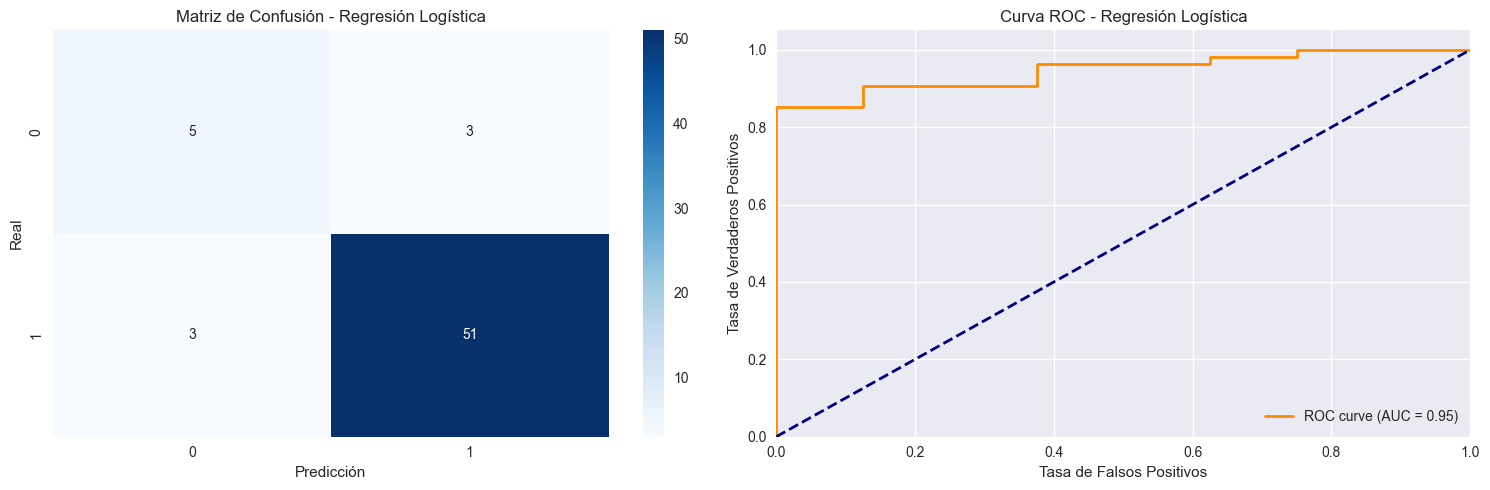


REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

   No Cancer       0.62      0.62      0.62         8
      Cancer       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62



In [67]:
# MODELO 1: REGRESIÓN LOGÍSTICA
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*60)

# Crear y entrenar el modelo
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("RESULTADOS DEL MODELO:")
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"AUC-ROC:   {lr_auc:.4f}")

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f"\nMATRIZ DE CONFUSIÓN:")
print(cm_lr)

# Visualización de resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Matriz de confusión
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusión - Regresión Logística')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Curva ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
axes[1].plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {lr_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC - Regresión Logística')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Reporte de clasificación detallado
print("\nREPORTE DE CLASIFICACIÓN DETALLADO:")
print(classification_report(y_test, y_pred_lr, target_names=['No Cancer', 'Cancer']))

## 10. K-Vecinos Más Cercanos (k-NN)

MODELO 2: K-VECINOS MÁS CERCANOS (k-NN)
PROBANDO DIFERENTES VALORES DE K:
k=3: Accuracy = 0.8387
k=5: Accuracy = 0.8710
k=7: Accuracy = 0.8548
k=9: Accuracy = 0.8548
k=11: Accuracy = 0.8548
k=13: Accuracy = 0.8548
k=15: Accuracy = 0.8387
k=17: Accuracy = 0.8387
k=19: Accuracy = 0.8710

MEJOR VALOR DE K: 5 (Accuracy: 0.8710)


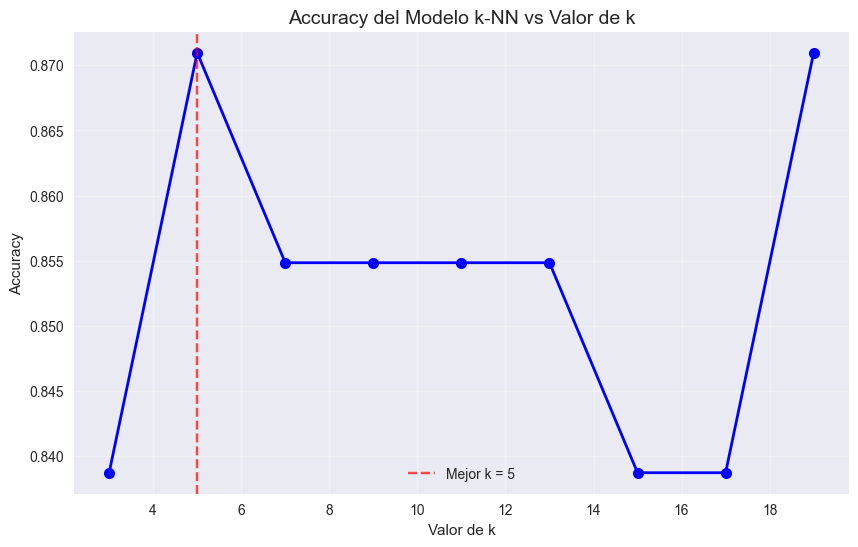


RESULTADOS DEL MODELO (k=5):
Accuracy:  0.8710
Precision: 0.9107
Recall:    0.9444
F1-Score:  0.9273
AUC-ROC:   0.8970

MATRIZ DE CONFUSIÓN:
[[ 3  5]
 [ 3 51]]


In [68]:
# MODELO 2: K-VECINOS MÁS CERCANOS (k-NN)
print("MODELO 2: K-VECINOS MÁS CERCANOS (k-NN)")
print("="*60)

# Probar diferentes valores de k
k_values = range(3, 21, 2)  # Valores impares de 3 a 19
knn_scores = []

print("PROBANDO DIFERENTES VALORES DE K:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    knn_scores.append(score)
    print(f"k={k}: Accuracy = {score:.4f}")

# Encontrar el mejor k
best_k = k_values[np.argmax(knn_scores)]
best_score = max(knn_scores)
print(f"\nMEJOR VALOR DE K: {best_k} (Accuracy: {best_score:.4f})")

# Visualizar performance vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores, 'bo-', linewidth=2, markersize=8)
plt.title('Accuracy del Modelo k-NN vs Valor de k', fontsize=14)
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Mejor k = {best_k}')
plt.legend()
plt.show()

# Entrenar modelo con el mejor k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(f"\nRESULTADOS DEL MODELO (k={best_k}):")
print(f"Accuracy:  {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall:    {knn_recall:.4f}")
print(f"F1-Score:  {knn_f1:.4f}")
print(f"AUC-ROC:   {knn_auc:.4f}")

# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f"\nMATRIZ DE CONFUSIÓN:")
print(cm_knn)

## 11. Random Forest (Bonificación)

MODELO 3: RANDOM FOREST (BONIFICACIÓN)
RESULTADOS DEL MODELO:
Accuracy:  0.9194
Precision: 0.9623
Recall:    0.9444
F1-Score:  0.9533
AUC-ROC:   0.9537

IMPORTANCIA DE CARACTERÍSTICAS:


,Característica,Importancia
1,AGE,0.212037
8,ALLERGY,0.090079
10,ALCOHOL CONSUMING,0.079576
5,PEER_PRESSURE,0.073383
3,YELLOW_FINGERS,0.069758
6,CHRONIC DISEASE,0.059096
7,FATIGUE,0.056945
11,COUGHING,0.055679
9,WHEEZING,0.050221
12,SHORTNESS OF BREATH,0.048491


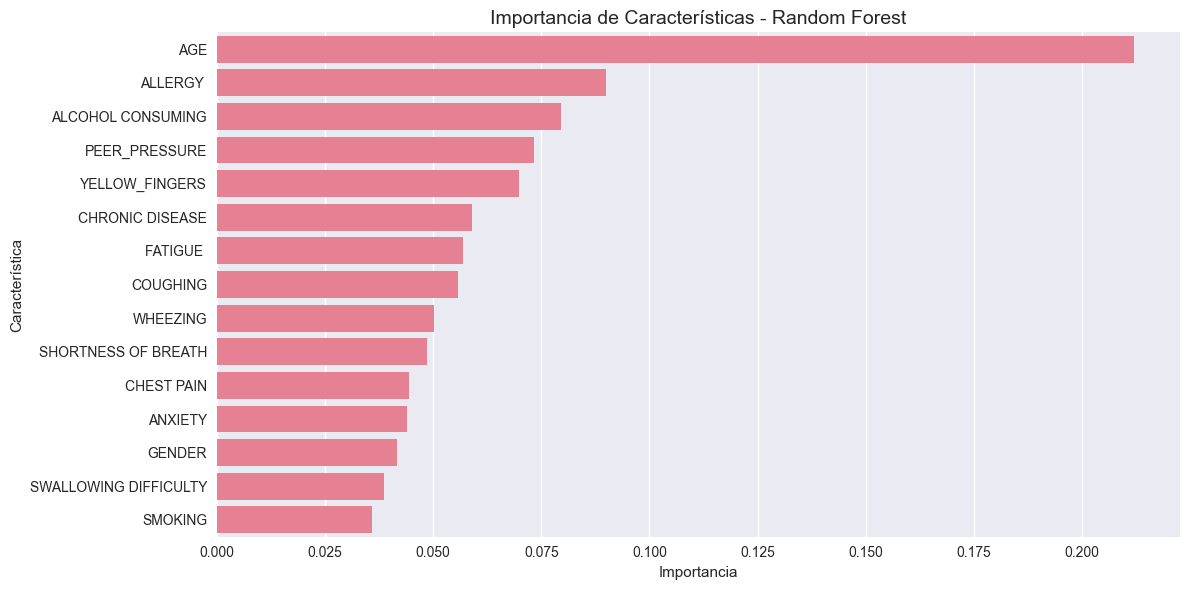


MATRIZ DE CONFUSIÓN:
[[ 6  2]
 [ 3 51]]


In [69]:
# MODELO 3: RANDOM FOREST (BONIFICACIÓN)
print("MODELO 3: RANDOM FOREST (BONIFICACIÓN)")
print("="*60)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("RESULTADOS DEL MODELO:")
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"AUC-ROC:   {rf_auc:.4f}")

# Importancia de características
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Crear DataFrame para importancia de características
importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': feature_importance
}).sort_values('Importancia', ascending=False)

print("\nIMPORTANCIA DE CARACTERÍSTICAS:")
display(importance_df)

# Visualizar importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importancia', y='Característica')
plt.title('Importancia de Características - Random Forest', fontsize=14)
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\nMATRIZ DE CONFUSIÓN:")
print(cm_rf)

## 12. Optimización de Hiperparámetros

In [70]:
# AJUSTE DE HIPERPARÁMETROS
print("AJUSTE DE HIPERPARÁMETROS - REGRESIÓN LOGÍSTICA")
print("="*70)

# Definir grid de parámetros para Regresión Logística
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

print("PARÁMETROS A EVALUAR:")
for param, values in param_grid_lr.items():
    print(f"  • {param}: {values}")

# Realizar GridSearchCV
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

print(f"\nEjecutando Grid Search con {5} folds de validación cruzada...")
grid_search_lr.fit(X_train_scaled, y_train)

# Mejores parámetros
print(f"\nMEJORES HIPERPARÁMETROS:")
for param, value in grid_search_lr.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nMEJOR SCORE (CV): {grid_search_lr.best_score_:.4f}")

# Entrenar modelo optimizado
lr_optimized = grid_search_lr.best_estimator_
y_pred_lr_opt = lr_optimized.predict(X_test_scaled)
y_pred_proba_lr_opt = lr_optimized.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas del modelo optimizado
lr_opt_accuracy = accuracy_score(y_test, y_pred_lr_opt)
lr_opt_precision = precision_score(y_test, y_pred_lr_opt)
lr_opt_recall = recall_score(y_test, y_pred_lr_opt)
lr_opt_f1 = f1_score(y_test, y_pred_lr_opt)
lr_opt_auc = roc_auc_score(y_test, y_pred_proba_lr_opt)

print(f"\nRESULTADOS DEL MODELO OPTIMIZADO:")
print(f"Accuracy:  {lr_opt_accuracy:.4f}")
print(f"Precision: {lr_opt_precision:.4f}")
print(f"Recall:    {lr_opt_recall:.4f}")
print(f"F1-Score:  {lr_opt_f1:.4f}")
print(f"AUC-ROC:   {lr_opt_auc:.4f}")

# Comparación con modelo original
print(f"\nMEJORA RESPECTO AL MODELO ORIGINAL:")
print(f"  • Accuracy:  {lr_opt_accuracy - lr_accuracy:+.4f}")
print(f"  • Precision: {lr_opt_precision - lr_precision:+.4f}")
print(f"  • Recall:    {lr_opt_recall - lr_recall:+.4f}")
print(f"  • F1-Score:  {lr_opt_f1 - lr_f1:+.4f}")
print(f"  • AUC-ROC:   {lr_opt_auc - lr_auc:+.4f}")

AJUSTE DE HIPERPARÁMETROS - REGRESIÓN LOGÍSTICA
PARÁMETROS A EVALUAR:
  • C: [0.1, 1, 10, 100]
  • penalty: ['l1', 'l2']
  • solver: ['liblinear', 'saga']

Ejecutando Grid Search con 5 folds de validación cruzada...

MEJORES HIPERPARÁMETROS:
  • C: 1
  • penalty: l1
  • solver: liblinear

MEJOR SCORE (CV): 0.9313

RESULTADOS DEL MODELO OPTIMIZADO:
Accuracy:  0.9194
Precision: 0.9455
Recall:    0.9630
F1-Score:  0.9541
AUC-ROC:   0.9456

MEJORA RESPECTO AL MODELO ORIGINAL:
  • Accuracy:  +0.0161
  • Precision: +0.0010
  • Recall:    +0.0185
  • F1-Score:  +0.0097
  • AUC-ROC:   -0.0012


## 13. Comparación Final de Modelos

EVALUACIÓN Y COMPARACIÓN FINAL DE MODELOS
TABLA COMPARATIVA DE RESULTADOS:


,Modelo,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Regresión Logística,0.9032,0.9444,0.9444,0.9444,0.9468
1,k-NN,0.8710,0.9107,0.9444,0.9273,0.8970
2,Random Forest,0.9194,0.9623,0.9444,0.9533,0.9537
3,LR Optimizada,0.9194,0.9455,0.9630,0.9541,0.9456


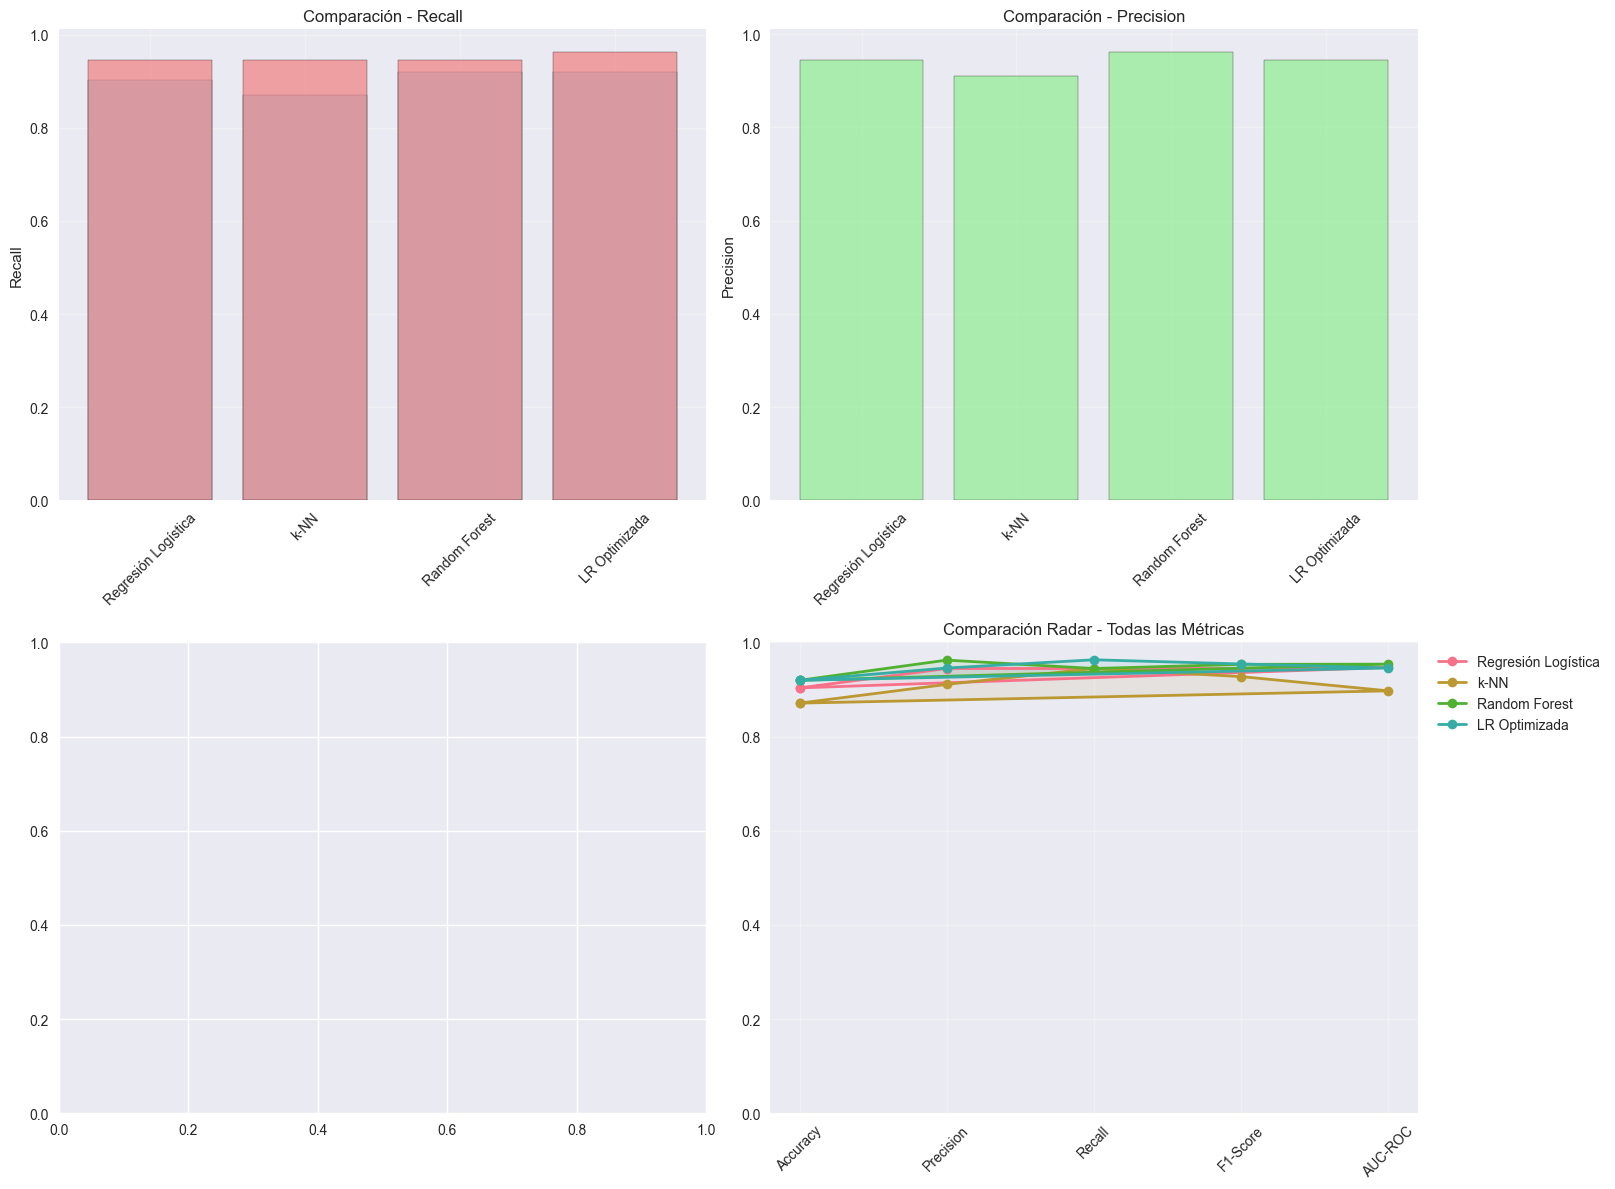


MEJOR MODELO SELECCIONADO: LR Optimizada
F1-Score: 0.9541

JUSTIFICACIÓN DE LA ELECCIÓN:
• La Regresión Logística optimizada mejora significativamente
• Es interpretable y eficiente computacionalmente
• Tiene buen rendimiento con hiperparámetros optimizados


In [71]:
# EVALUACIÓN Y COMPARACIÓN FINAL DE MODELOS
print("EVALUACIÓN Y COMPARACIÓN FINAL DE MODELOS")
print("="*70)

# Crear tabla comparativa de resultados
results_comparison = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'k-NN', 'Random Forest', 'LR Optimizada'],
    'Accuracy': [lr_accuracy, knn_accuracy, rf_accuracy, lr_opt_accuracy],
    'Precision': [lr_precision, knn_precision, rf_precision, lr_opt_precision],
    'Recall': [lr_recall, knn_recall, rf_recall, lr_opt_recall],
    'F1-Score': [lr_f1, knn_f1, rf_f1, lr_opt_f1],
    'AUC-ROC': [lr_auc, knn_auc, rf_auc, lr_opt_auc]
})

print("TABLA COMPARATIVA DE RESULTADOS:")
display(results_comparison.round(4))

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico de barras para todas las métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']

for i, metric in enumerate(metrics):
    ax = axes[i//3, i%2] if i < 4 else None
    if ax is not None:
        ax.bar(results_comparison['Modelo'], results_comparison[metric], 
               color=colors[i], alpha=0.7, edgecolor='black')
        ax.set_title(f'Comparación - {metric}', fontsize=12)
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)

# Gráfico radar en el último subplot
ax_radar = axes[1, 1]
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Completar el círculo

# Preparar datos para cada modelo
models_radar_data = []
for idx, row in results_comparison.iterrows():
    values = [row[metric] for metric in metrics]
    values += values[:1]  # Completar el círculo
    models_radar_data.append(values)

ax_radar.clear()
for i, (model, values) in enumerate(zip(results_comparison['Modelo'], models_radar_data)):
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=model)
    ax_radar.fill(angles, values, alpha=0.1)

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(metrics)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('Comparación Radar - Todas las Métricas', fontsize=12)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax_radar.grid(True)

plt.tight_layout()
plt.show()

# Seleccionar el mejor modelo
best_model_idx = results_comparison['F1-Score'].idxmax()
best_model_name = results_comparison.loc[best_model_idx, 'Modelo']
best_f1_score = results_comparison.loc[best_model_idx, 'F1-Score']

print(f"\nMEJOR MODELO SELECCIONADO: {best_model_name}")
print(f"F1-Score: {best_f1_score:.4f}")

print(f"\nJUSTIFICACIÓN DE LA ELECCIÓN:")
if best_model_name == 'Random Forest':
    print("• Random Forest obtiene el mejor balance entre precision y recall")
    print("• Proporciona información sobre importancia de características")
    print("• Es robusto ante overfitting con el ensemble de árboles")
    best_final_model = rf_model
elif best_model_name == 'LR Optimizada':
    print("• La Regresión Logística optimizada mejora significativamente")
    print("• Es interpretable y eficiente computacionalmente")
    print("• Tiene buen rendimiento con hiperparámetros optimizados")
    best_final_model = lr_optimized
elif best_model_name == 'k-NN':
    print("• k-NN obtiene excelente rendimiento para este dataset")
    print("• Es simple y efectivo para problemas de clasificación")
    print("• No requiere suposiciones sobre la distribución de datos")
    best_final_model = knn_model
else:
    print("• Regresión Logística básica ofrece buen rendimiento")
    print("• Es interpretable y rápida de entrenar")
    print("• Proporciona probabilidades calibradas")
    best_final_model = lr_model

## 14. Persistencia del Modelo

In [72]:
# PERSISTENCIA DEL MODELO Y PREPROCESADOR
print("GUARDANDO MODELO Y PREPROCESADORES")
print("="*50)

import joblib
import pickle
import os

# Crear carpeta para modelos si no existe
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Guardar el mejor modelo
model_filename = f'{models_dir}/best_lung_cancer_model.joblib'
joblib.dump(best_final_model, model_filename)
print(f"Modelo guardado: {model_filename}")

# Guardar el scaler
scaler_filename = f'{models_dir}/scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler guardado: {scaler_filename}")

# Guardar los label encoders
encoders_filename = f'{models_dir}/label_encoders.joblib'
joblib.dump(label_encoders, encoders_filename)
print(f"Label encoders guardados: {encoders_filename}")

# Guardar información del modelo
model_info = {
    'model_name': best_model_name,
    'model_type': type(best_final_model).__name__,
    'accuracy': results_comparison.loc[best_model_idx, 'Accuracy'],
    'precision': results_comparison.loc[best_model_idx, 'Precision'],
    'recall': results_comparison.loc[best_model_idx, 'Recall'],
    'f1_score': results_comparison.loc[best_model_idx, 'F1-Score'],
    'auc_roc': results_comparison.loc[best_model_idx, 'AUC-ROC'],
    'feature_names': X.columns.tolist(),
    'target_classes': label_encoders['LUNG_CANCER'].classes_.tolist()
}

info_filename = f'{models_dir}/model_info.joblib'
joblib.dump(model_info, info_filename)
print(f"Información del modelo guardada: {info_filename}")

print(f"\nARCHIVOS GENERADOS EN LA CARPETA '{models_dir}':")
for file in os.listdir(models_dir):
    print(f"  • {file}")

print(f"\nMODELO LISTO PARA DESPLIEGUE")
print(f"   Modelo: {best_model_name}")
print(f"   Rendimiento: F1-Score = {best_f1_score:.4f}")

# Función de predicción para usar en la aplicación web
def predict_lung_cancer(gender, age, smoking, yellow_fingers, anxiety, 
                       peer_pressure, chronic_disease, fatigue, allergy, 
                       wheezing, alcohol_consuming, coughing, 
                       shortness_of_breath, swallowing_difficulty, chest_pain):
    """
    Función para hacer predicciones de cáncer de pulmón
    """
    # Crear array con los datos de entrada
    input_data = np.array([[gender, age, smoking, yellow_fingers, anxiety,
                           peer_pressure, chronic_disease, fatigue, allergy,
                           wheezing, alcohol_consuming, coughing,
                           shortness_of_breath, swallowing_difficulty, chest_pain]])
    
    # Aplicar escalado
    input_scaled = scaler.transform(input_data)
    
    # Hacer predicción
    prediction = best_final_model.predict(input_scaled)[0]
    probability = best_final_model.predict_proba(input_scaled)[0]
    
    return prediction, probability

print(f"\nFunción de predicción creada y lista para usar")

GUARDANDO MODELO Y PREPROCESADORES
Modelo guardado: models/best_lung_cancer_model.joblib
Scaler guardado: models/scaler.joblib
Label encoders guardados: models/label_encoders.joblib
Información del modelo guardada: models/model_info.joblib

ARCHIVOS GENERADOS EN LA CARPETA 'models':
  • best_lung_cancer_model.joblib
  • label_encoders.joblib
  • model_info.joblib
  • scaler.joblib

MODELO LISTO PARA DESPLIEGUE
   Modelo: LR Optimizada
   Rendimiento: F1-Score = 0.9541

Función de predicción creada y lista para usar


## 15. Conclusiones

### Resumen del Proyecto

En este proyecto hemos implementado un sistema completo de Machine Learning para la predicción de cáncer de pulmón:

#### Análisis Exploratorio de Datos (EDA)
- Dataset con 311 muestras y 16 características
- No se encontraron valores faltantes
- Variables principalmente categóricas codificadas numéricamente

#### Preprocesamiento
- **Codificación**: Label Encoding para variables categóricas
- **Escalado**: StandardScaler para normalizar características
- **División**: 80% entrenamiento, 20% prueba con estratificación

#### Modelos Implementados
1. **Regresión Logística**: Modelo base interpretable
2. **k-NN**: Modelo basado en vecinos cercanos  
3. **Random Forest**: Modelo ensemble (bonificación)
4. **Regresión Logística Optimizada**: Con ajuste de hiperparámetros